# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#2.1
gifts = pd.read_csv('/content/ForeignGifts_edu.csv')
gifts.head()


,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


In [9]:
gifts.columns

Index(['ID', 'OPEID', 'Institution Name', 'City', 'State',
       'Foreign Gift Received Date', 'Foreign Gift Amount', 'Gift Type',
       'Country of Giftor', 'Giftor Name'],
      dtype='object')

,Foreign Gift Amount
count,2.822100e+04
mean,5.882327e+05
std,3.222011e+06
min,-5.377700e+05
25%,5.700000e+03
50%,9.461500e+04
75%,3.761420e+05
max,1.000000e+08


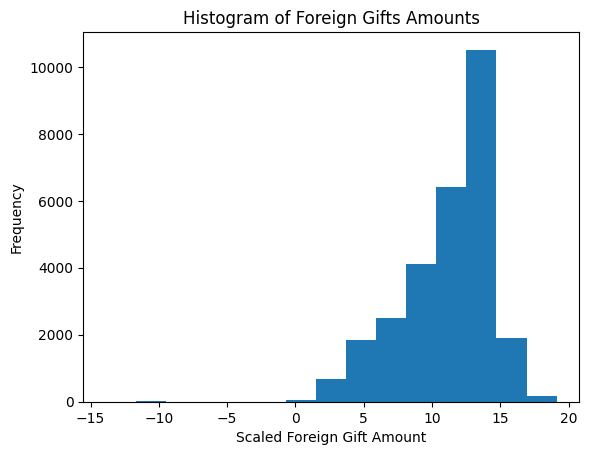

In [30]:
#2.2 for foreign gift amount variable, create a histogram, describe the variable, describe your findings

#sns.histplot(gifts['Foreign Gift Amount'])
#scaling with inverse hyperbolic sine function
gifts['log2'] = np.arcsinh(gifts['Foreign Gift Amount'])

gifts['log2'].hist(bins = 15, grid = False)
plt.xlabel('Scaled Foreign Gift Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Foreign Gifts Amounts')

gifts['Foreign Gift Amount'].describe()

#This variable captures the monetary sums of gifts given to education institutions in the U.S.
#The histogram shows that there is a rough bell curve with a bit of a left tail. The percentiles indicate that there is a wide range for
#these gifts with the 25% of the data being $376,142 or higher and the lowest 25% being $5,700 or lower.


In [52]:
#2.3 For Gift Type, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
#reset the index to call the columns in the series
gt = gifts['Gift Type'].value_counts().reset_index()
gt.columns = ['Gift Type', 'Count']

#use iloc (integer location to grab numbers)
contract_percent = (gt.iloc[0,1]/len(gifts))*100
round(contract_percent, 2)
#61.21 percent are contract gifts

real_estate = (gt.iloc[1,1]/len(gifts))*100
round(real_estate, 2)
#38.75 % are real estate gifts

monetary = (gt.iloc[2,1]/len(gifts))*100
round(monetary, 2)
#0.04 percent are monetary gifts

0.04

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


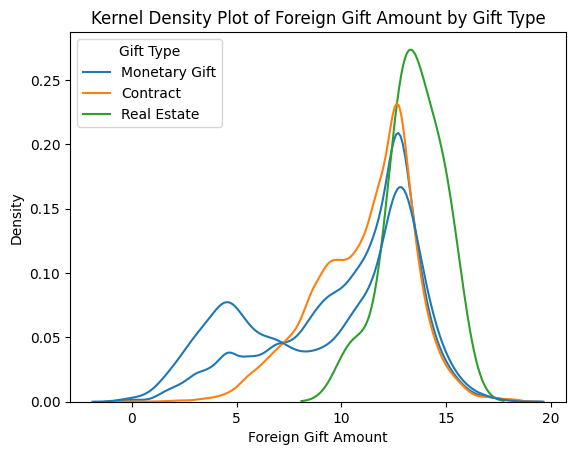

In [59]:
#2.4 Create a kernel density plot of the log of Foreign Gift Amount, and then a kernel density plot of the log of
#Foreign Gift Amount conditional on gift type. Do you notice any patterns?

#kdeplot (log) of foreign gift amount
sns.kdeplot(np.log(gifts['Foreign Gift Amount']))
#This plot shows a peak around 12 for the log of the gift amount.

#'' conditional on gift type
condition  = 'Gift Type'
var = np.log(gifts['Foreign Gift Amount'])
fig = sns.kdeplot(data = gifts, x = var, hue = condition, common_norm = False).set(title = 'Kernel Density Plot of Foreign Gift Amount by Gift Type')
#This plot indicates that real estate gifts tend to be slightly higher in value than the other types of gifts.
#It also indicates that the variance of the real estate gifts is smaller than that of the other two types.


In [80]:
#2.5 What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?

#top 15 countries ( num gifts)
#'Country of Giftor' col
top_15_num = gifts['Country of Giftor'].value_counts().reset_index()
top_15_num.columns = ['Country', 'Count']
top_15_num.iloc[0:15, 0]


#top 15 countries (amt given)
#'Foreign Gift Amount' col
top_15_amt = gifts.groupby('Country of Giftor')['Foreign Gift Amount'].sum()
top_15_amt = top_15_amt.sort_values(ascending = False)
top_15_amt.head(15)

,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


<Axes: xlabel='Foreign Gift Amount', ylabel='Count'>

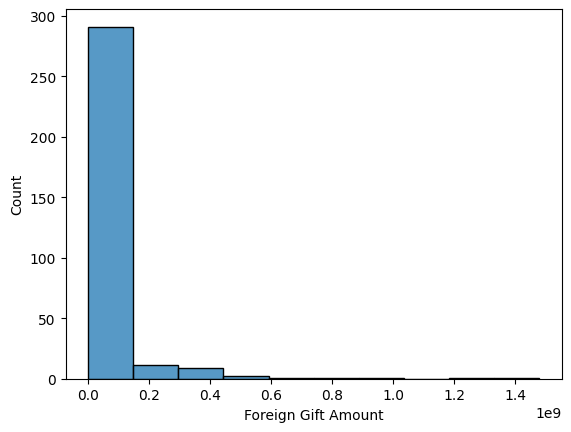

In [93]:
#2.6 What are the top 15 institutions in terms of the total amount of money they receive?
#Make a histogram of the total amount received by all institutions.

#top 15 total money
#'Institution Name' , 'Foreign Gift Amount'
top_15_total = gifts.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending = False).head(15)
top_15_total

#hist of total amt recieved by all inst
inst_total = gifts.groupby('Institution Name')['Foreign Gift Amount'].sum().reset_index()
inst_total

sns.histplot(inst_total['Foreign Gift Amount'], bins = 10)

In [99]:
#2.7 Which giftors provide the most money, in total?
#Giftor Name

top_giftors = gifts.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending = False).head(10)

top_giftors


,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [100]:
#3.1 load data
rent = pd.read_csv('/content/airbnb_hw.csv')



In [103]:
#3.1 dimensions, observations, variables head()
rent.shape #30478 rows, 13 columns
rent.columns #lists the variable names
rent.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [105]:
#3.3 Cross tabulate Room Type and Property Type. What patterns do you see in what kinds of rentals are available?
#For which kinds of properties are private rooms more common than renting the entire property?

#cross tab
room_property = pd.crosstab(rent['Room Type'], rent['Property Type'])
room_property

#Some of the property types are a bit perculiar and unusual such as castle and treehouse, so these do not have many entries across any of the
#room types. Other more common property types such as apartments and houses have high overlap with each of the room types.

#Renting private rooms are more common than renting the entire property for bed & breakfast, houses, dorms, and other.


Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


TypeError: loop of ufunc does not support argument 0 of type str which has no callable log method

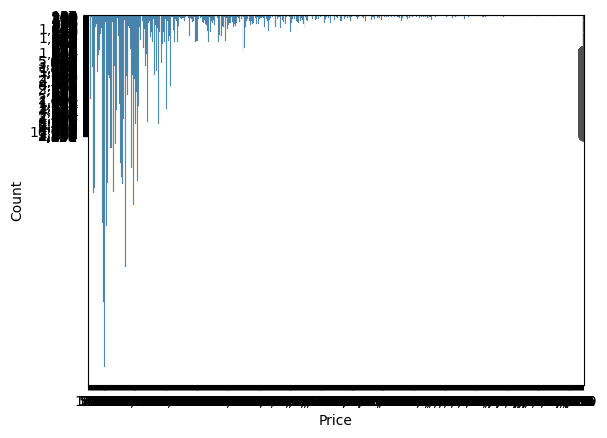

In [117]:
#For Price, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled?
 #Are there many outliers? Use log to transform price into a new variable, price_log, and take these steps again.

sns.histplot(rent['Price'])

#sns.kdeplot(rent['Price'])

sns.boxplot(rent['Price'])

rent['Price'].describe()

#Yes, the data is poorly scaled for each of the graphs. It is hard to detect outliers when the graph is so jumbled that it is hard
#enough to read in the first place. But, it seems that there are some outliers.

rent['price_log'] = np.log(rent['Price'])

#df.loc[df['bond_log']>0,'bond_log'].hist(bins=20,grid=False) use for >0 to avoid crash
sns.histplot(rent['price log'])

sns.kdeplot(rent['price_log'])

sns.boxplot(rent['price_log'])

rent['price_log'].describe()

#describe outliers now


In [118]:
#5.5 Make a scatterplot of price_log and Beds. Describe what you see.
#or label var 1 = 'price_log'
sns.scatterplot(data = rent, x = 'price_log', y = 'Beds').set(title = 'Scatterplot of Rental Price of Beds')
plt.show()

#describe
#Use .groupby() to compute a desciption of Price conditional on/grouped by the number of beds.
bed_count = rent.groupby('Beds')['Price'].sum().value_counts()
#maybe sort_values ?
#Describe any patterns you see in the average price and standard deviation in prices.
bed_count.mean()
bed_count.std()


Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')

In [ ]:
#5.6 Make a scatterplot of price_log and Beds, but color the graph by Room Type and Property Type. What patterns do you see?
#Compute a description of Price conditional on Room Type and Property Type. Which Room Type and Property Type have the highest prices on average?
#Which have the highest standard deviation?
#Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

sns.scatterplot(data = rent, x = 'price_log', y='Beds', hue='Room Type', style= 'Property Type')
#patterns

#?

#.std

#...median is resistant to outliers

In [ ]:
#5.7 We've looked a bit at this price_log and Beds scatterplot.

#Use seaborn to make a jointplot with kind=hex. Where are the data actually distributed?
sns.jointplot(data=rent , x = 'price_log', y = 'Beds', kind = 'hex')
#where data dist...
#How does it affect the way you think about the plots in 5 and 6?


**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.